In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
train = pd.read_csv("/Users/shaikrahul/Desktop/cs550-Machine learning/Prog_Assignments/train_NYTaxi.csv")
testt = pd.read_csv("/Users/shaikrahul/Desktop/cs550-Machine learning/Prog_Assignments/test_NYTaxi.csv")
train  = train.drop('Unnamed: 0',axis=1)
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5


In [2]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))
train.info()

Shape of the Training data : (100000, 8)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                100000 non-null  object 
 1   fare_amount        100000 non-null  float64
 2   pickup_datetime    100000 non-null  object 
 3   pickup_longitude   100000 non-null  float64
 4   pickup_latitude    100000 non-null  float64
 5   dropoff_longitude  100000 non-null  float64
 6   dropoff_latitude   100000 non-null  float64
 7   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


In [3]:
#check for missing values in train data
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [4]:
#check for missing values in test data
testt.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [5]:
## drop the missing values
## there is no misssing values
train['fare_amount'].head()

0     4.9
1     4.9
2     6.9
3    14.1
4    12.1
Name: fare_amount, dtype: float64

In [6]:
#Look for no. of non-positive fare_amount values.
print('No.of non-positive fare_amoun values is',train[train['fare_amount'] <= 0 ].shape[0])
print()
train[train['fare_amount'] <= 0 ].head()

No.of non-positive fare_amoun values is 6



,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
38446,2010-03-13 15:29:10.0000003,-9.3,2010-03-13 15:29:10 UTC,-73.977015,40.779925,-73.949747,40.790322,3
38582,2010-02-27 02:37:10.0000004,-6.9,2010-02-27 02:37:10 UTC,-73.987800,40.747842,-73.981702,40.763600,1
44049,2015-01-25 18:00:06.0000005,0.0,2015-01-25 18:00:06 UTC,-73.801102,40.670094,-73.801086,40.670536,1
55472,2015-02-23 09:34:48.0000002,0.0,2015-02-23 09:34:48 UTC,-73.982201,40.768417,-73.981392,40.764874,1
61165,2010-03-24 14:21:10.0000001,-2.5,2010-03-24 14:21:10 UTC,-73.953752,40.813413,-73.953743,40.813407,1


In [7]:
# Remove the non-positive fare_amount values.
train = train[train['fare_amount'] > 0 ]

In [8]:
### droping duplicates
train.drop_duplicates(inplace=True)

In [9]:
#no more negative values in the fare field
train['fare_amount'].describe()

count    99994.000000
mean        11.334431
std          9.810440
min          0.010000
25%          6.000000
50%          8.500000
75%         12.500000
max        394.000000
Name: fare_amount, dtype: float64

In [10]:
# remove outliers

In [11]:
#Googling gave me this info

# Latitudes range from -90 to 90.
# Longitudes range from -180 to 180.
train  = train[train['pickup_longitude'] >= -180 ]
train =  train[train['dropoff_longitude'] <= 180]

train = train[train['pickup_latitude'] <=90]
train =  train[train['dropoff_latitude'] >= -90]
train.shape

(99992, 8)

In [12]:
# convert train dataset

train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])
train.head()
#Convert for test data
testt['key'] = pd.to_datetime(testt['key'])
testt['pickup_datetime']  = pd.to_datetime(testt['pickup_datetime'])

In [13]:
#check the dtypes after conversion
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [14]:
testt.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [15]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, testt]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [16]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [17]:
train.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-04-08 19:11:10.000000400,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2,1.116850
1,2012-07-30 16:19:08.000000300,4.9,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2,1.055053


In [18]:

data = [train,testt]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [19]:
train.head(1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-04-08 19:11:10.000000400,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.72749,-73.989854,40.735239,2,1.11685,2009,4,8,2,19


In [20]:
testt.head(1)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.97332,40.763805,-73.98143,40.743835,1,2.32326,2015,1,27,1,13


In [21]:
train['Year'] = train['Year'].astype(str)
testt['Year'] = testt['Year'].astype(str)


In [22]:
train = train.drop(['key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)
testt = testt.drop(['key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      99992 non-null  float64
 1   passenger_count  99992 non-null  int64  
 2   H_Distance       99992 non-null  float64
 3   Year             99992 non-null  object 
 4   Month            99992 non-null  int64  
 5   Date             99992 non-null  int64  
 6   Day of Week      99992 non-null  int64  
 7   Hour             99992 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 6.9+ MB


In [24]:
cat_col=[]
d =[]
for x in train.dtypes.index:
    if train.dtypes[x] =='object':
        cat_col.append(x)
    else:
        d.append(x)

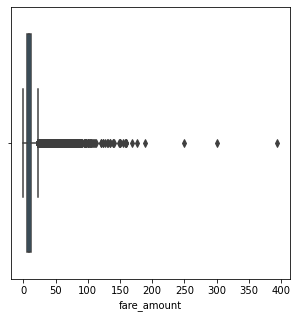

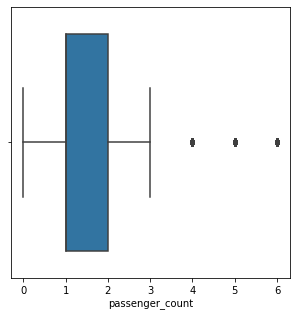

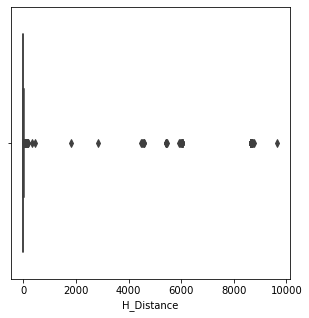

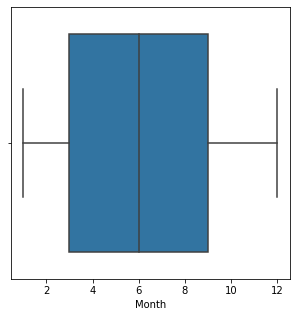

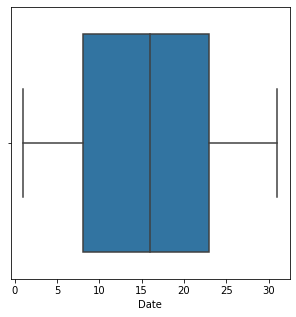

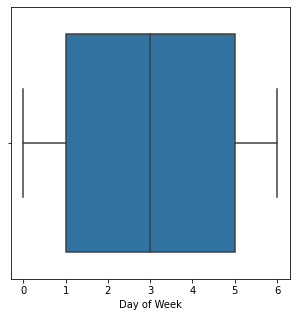

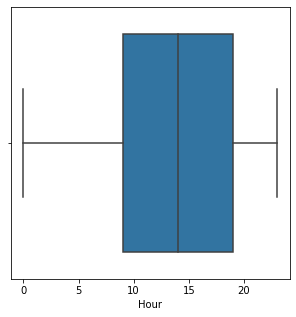

In [25]:
import matplotlib.pyplot as plt
def boxplot(aa):
    fig,ax=plt.subplots(figsize=(5,5))
    sns.boxplot(x=aa,data=train)
    plt.xlabel(aa)
    plt.show()


for c in d:
    boxplot(c)

<AxesSubplot:>

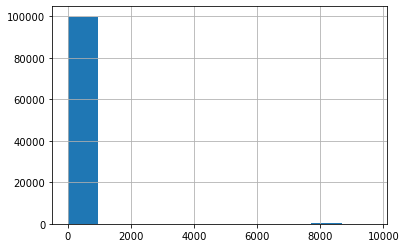

In [26]:
train['H_Distance'].hist(bins=10)

<AxesSubplot:>

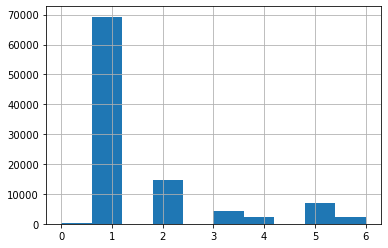

In [27]:
train['passenger_count'].hist(bins=10)

In [28]:
train['Day of Week'].unique()

array([2, 0, 1, 3, 4, 6, 5])

In [29]:
train

,fare_amount,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,4.9,2,1.116850,2009,4,8,2,19
1,4.9,2,1.055053,2012,7,30,0,16
2,6.9,1,2.715959,2011,2,22,1,13
3,14.1,1,5.101370,2010,10,7,3,21
4,12.1,5,4.800593,2009,10,2,4,22
...,...,...,...,...,...,...,...,...
99995,4.5,1,1.198577,2015,6,8,0,7
99996,25.5,1,8.073564,2012,9,17,0,15
99997,14.5,1,2.808335,2013,2,2,5,19
99998,9.0,1,2.076158,2013,12,28,5,15


In [30]:
def aa(df,col,a):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25) 
    up_b = df[col].quantile(0.75) + (a*iqr)
    lo_b = df[col].quantile(0.75) - (a*iqr)
    df = df[(df[col] < up_b) & (df[col] > lo_b)]
    return df

In [31]:
train = aa(train, 'H_Distance',4.5)

In [32]:
train = aa(train,'fare_amount',4.5)

In [33]:
train = aa(train,'passenger_count',2.5)

In [34]:
train.shape

(87835, 8)

<AxesSubplot:>

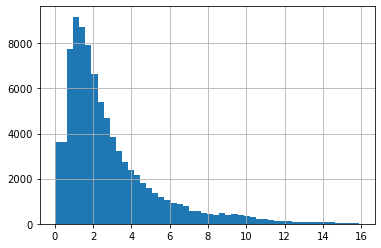

In [35]:
train['H_Distance'].hist(bins=50)

<AxesSubplot:>

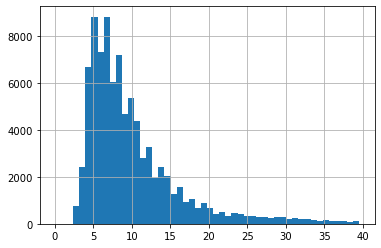

In [36]:
train['fare_amount'].hist(bins=50)

/opt/anaconda3/envs/machine/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

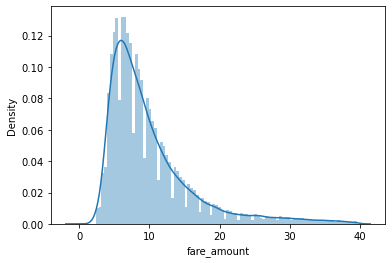

In [37]:
## Exploratory Data Analysis
import seaborn as sns
sns.distplot(train['fare_amount'],bins=100)

/opt/anaconda3/envs/machine/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='H_Distance', ylabel='Density'>

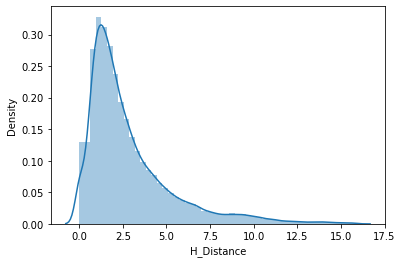

In [38]:
sns.distplot(train['H_Distance'],bins=50) 

/opt/anaconda3/envs/machine/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

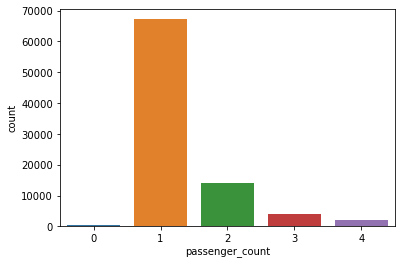

In [39]:
sns.countplot(train['passenger_count'])

/opt/anaconda3/envs/machine/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Year', ylabel='count'>

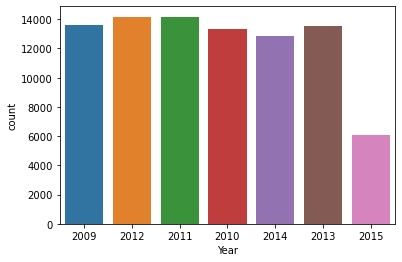

In [40]:
sns.countplot(train['Year'])

/opt/anaconda3/envs/machine/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Month', ylabel='count'>

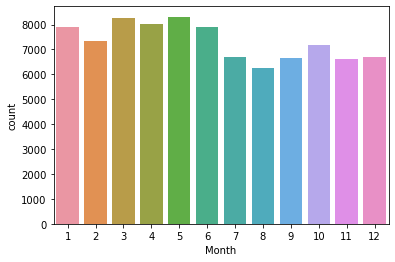

In [41]:
sns.countplot(train['Month'])

/opt/anaconda3/envs/machine/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Date', ylabel='count'>

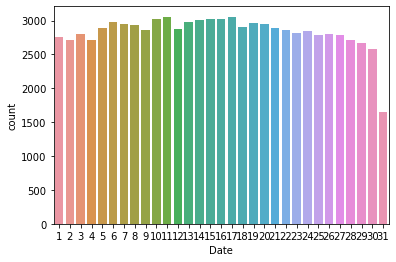

In [42]:
sns.countplot(train['Date'])

/opt/anaconda3/envs/machine/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Day of Week', ylabel='count'>

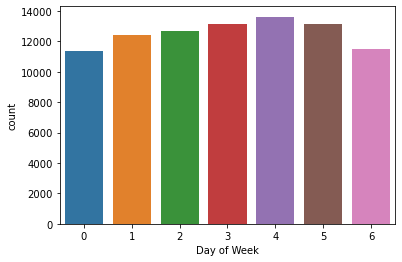

In [43]:
sns.countplot(train['Day of Week'])

<AxesSubplot:xlabel='Year', ylabel='fare_amount'>

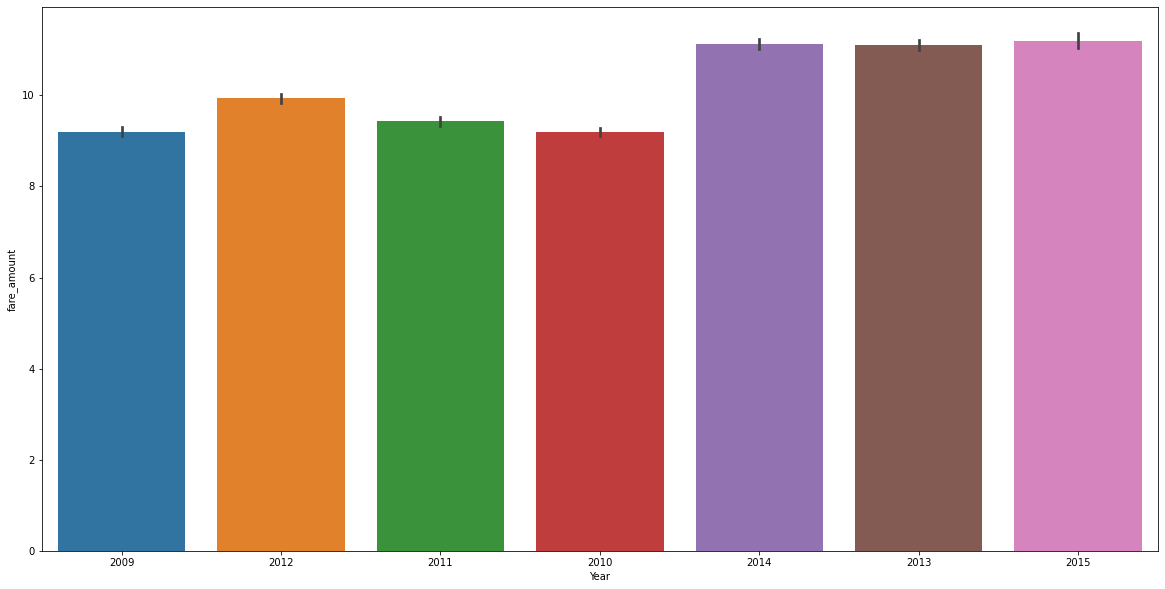

In [44]:
## Bivariate
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(data=train,x='Year',y='fare_amount',ax=ax)

In [45]:
train.columns

Index(['fare_amount', 'passenger_count', 'H_Distance', 'Year', 'Month', 'Date',
       'Day of Week', 'Hour'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='fare_amount'>

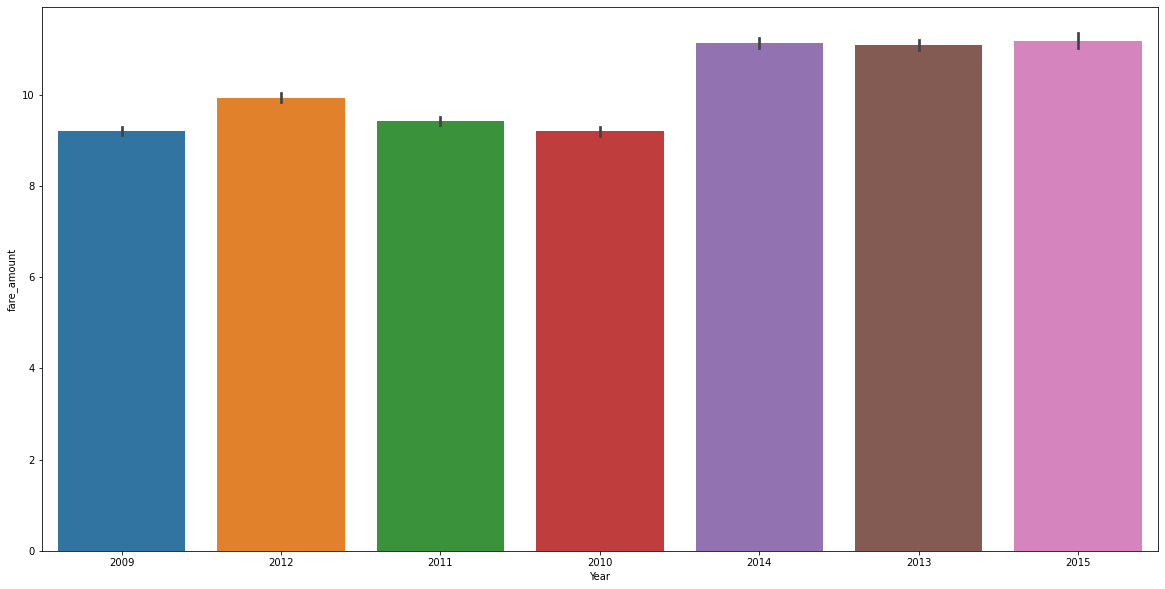

In [46]:
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(data=train,x='Year',y='fare_amount',ax=ax)

<AxesSubplot:xlabel='Month', ylabel='fare_amount'>

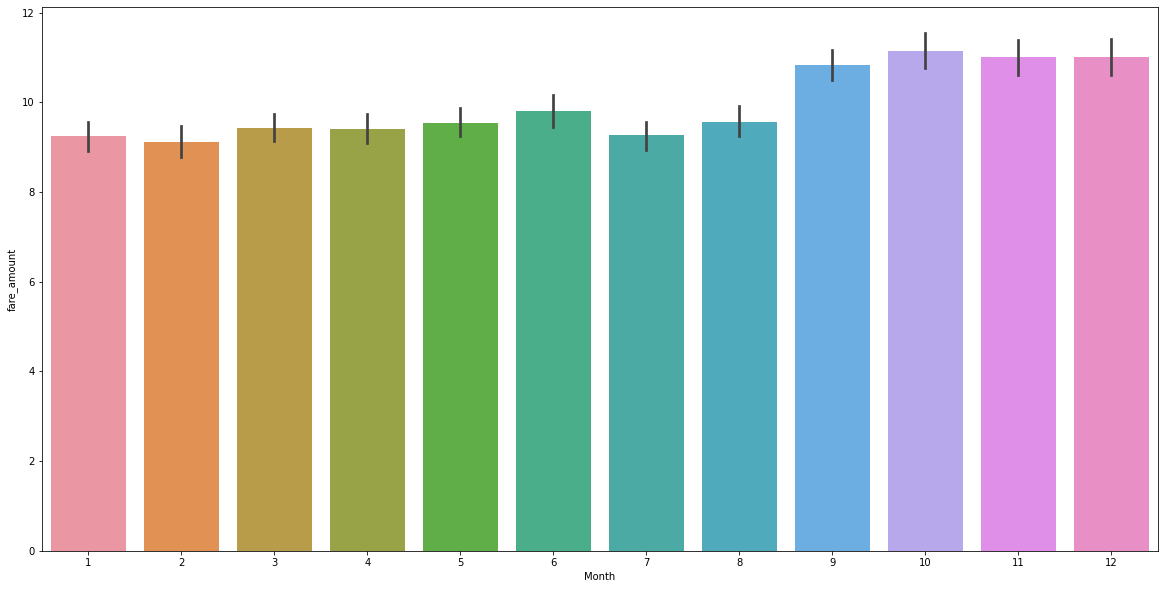

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
a = train[train['Year']=='2012']
sns.barplot(data=a,x='Month',y='fare_amount',ax=ax)

<AxesSubplot:xlabel='Day of Week', ylabel='fare_amount'>

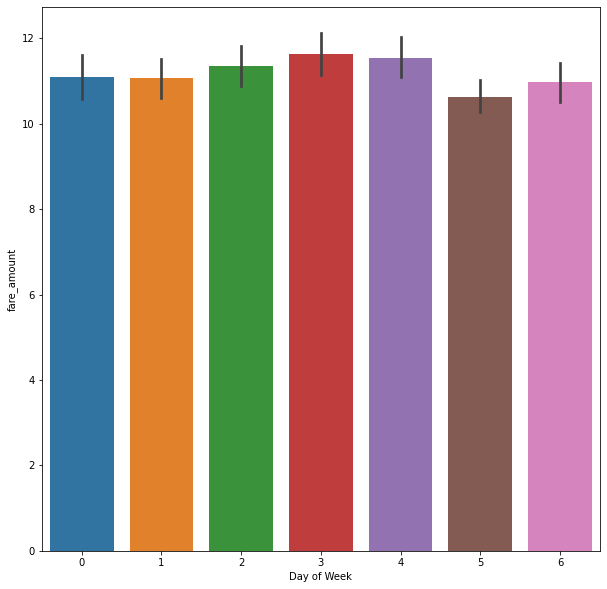

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
a = train[train['Year']=='2015']
sns.barplot(data=a ,x='Day of Week',y='fare_amount',ax=ax)

<AxesSubplot:xlabel='Hour', ylabel='fare_amount'>

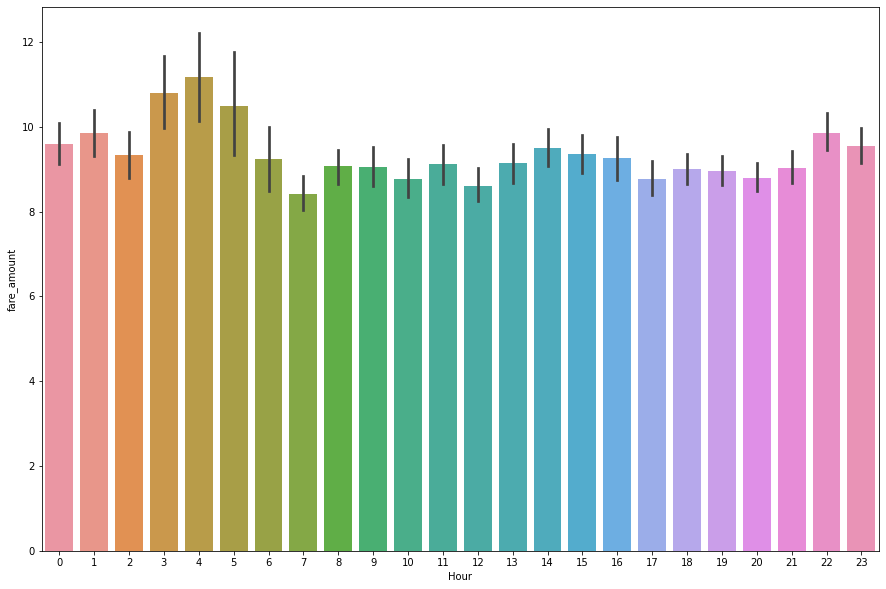

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
a = train[train['Year']=='2009']
sns.barplot(data=a ,x='Hour',y='fare_amount',ax=ax)

<AxesSubplot:xlabel='Hour', ylabel='fare_amount'>

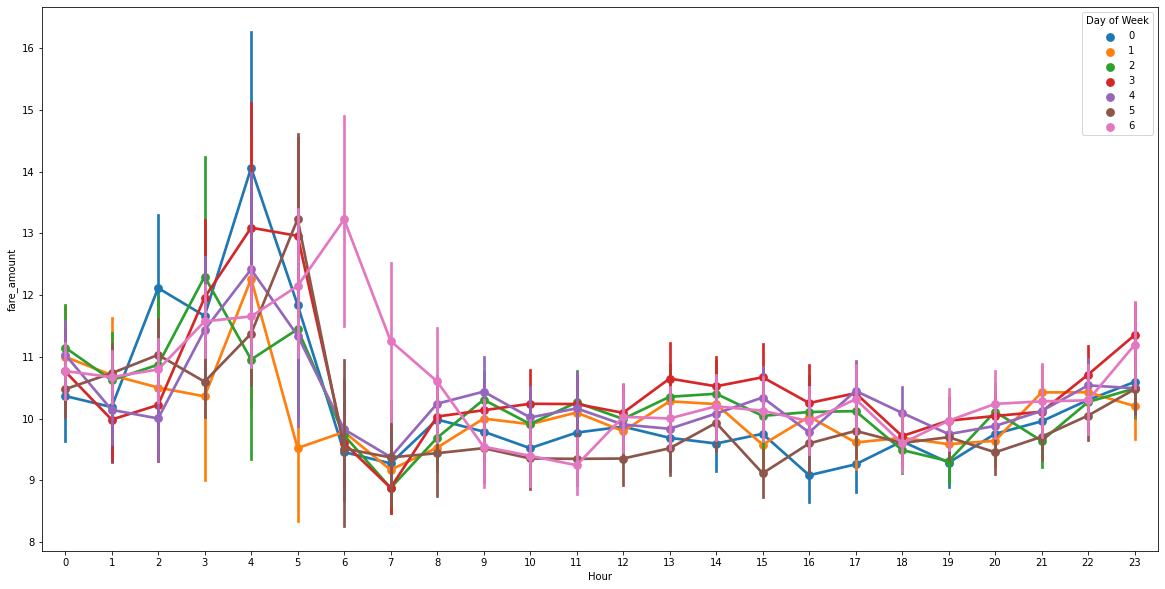

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=train, x='Hour', y='fare_amount',hue='Day of Week', ax=ax)

In [51]:
cat_col

['Year']

In [52]:
## one hot encoidng
train = pd.get_dummies(train ,columns=cat_col)


In [53]:
testt = pd.get_dummies(testt ,columns=cat_col)

In [54]:
train.head()

,fare_amount,passenger_count,H_Distance,Month,Date,Day of Week,Hour,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,4.9,2,1.116850,4,8,2,19,1,0,0,0,0,0,0
1,4.9,2,1.055053,7,30,0,16,0,0,0,1,0,0,0
2,6.9,1,2.715959,2,22,1,13,0,0,1,0,0,0,0
3,14.1,1,5.101370,10,7,3,21,0,1,0,0,0,0,0
5,21.3,1,7.088301,10,7,2,8,1,0,0,0,0,0,0


In [55]:
testt.head()

,passenger_count,H_Distance,Month,Date,Day of Week,Hour,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,1,2.323260,1,27,1,13,0,0,0,0,0,0,1
1,1,2.425353,1,27,1,13,0,0,0,0,0,0,1
2,1,0.618628,10,8,5,11,0,0,1,0,0,0,0
3,1,1.961033,12,1,5,21,0,0,0,1,0,0,0
4,1,5.387301,12,1,5,21,0,0,0,1,0,0,0


In [56]:
x = train.drop('fare_amount',axis=1)
y = train['fare_amount']

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=20)

In [58]:
## Pipeline
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [59]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [60]:
search.fit(x_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ................model__alpha=0.1;, score=-10.149 total time=   0.0s
[CV 2/5] END ................model__alpha=0.1;, score=-10.511 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-9.499 total time=   0.0s
[CV 4/5] END ................model__alpha=0.1;, score=-10.340 total time=   0.0s
[CV 5/5] END ................model__alpha=0.1;, score=-10.606 total time=   0.0s
[CV 1/5] END ................model__alpha=0.2;, score=-10.356 total time=   0.0s
[CV 2/5] END ................model__alpha=0.2;, score=-10.682 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-9.695 total time=   0.0s
[CV 4/5] END ................model__alpha=0.2;, score=-10.564 total time=   0.0s
[CV 5/5] END ................model__alpha=0.2;, score=-10.814 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-10.624 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004;,

[CV 3/5] END ................model__alpha=2.1;, score=-14.571 total time=   0.0s
[CV 4/5] END ................model__alpha=2.1;, score=-15.717 total time=   0.0s
[CV 5/5] END ................model__alpha=2.1;, score=-15.781 total time=   0.0s
[CV 1/5] END ................model__alpha=2.2;, score=-15.769 total time=   0.0s
[CV 2/5] END ................model__alpha=2.2;, score=-15.560 total time=   0.0s
[CV 3/5] END ................model__alpha=2.2;, score=-14.999 total time=   0.0s
[CV 4/5] END ................model__alpha=2.2;, score=-16.171 total time=   0.0s
[CV 5/5] END ................model__alpha=2.2;, score=-16.214 total time=   0.0s
[CV 1/5] END .model__alpha=2.3000000000000003;, score=-16.216 total time=   0.0s
[CV 2/5] END .model__alpha=2.3000000000000003;, score=-15.988 total time=   0.0s
[CV 3/5] END .model__alpha=2.3000000000000003;, score=-15.447 total time=   0.0s
[CV 4/5] END .model__alpha=2.3000000000000003;, score=-16.646 total time=   0.0s
[CV 5/5] END .model__alpha=2

[CV 4/5] END ................model__alpha=4.2;, score=-29.691 total time=   0.0s
[CV 5/5] END ................model__alpha=4.2;, score=-29.053 total time=   0.0s
[CV 1/5] END ................model__alpha=4.3;, score=-29.197 total time=   0.0s
[CV 2/5] END ................model__alpha=4.3;, score=-28.728 total time=   0.0s
[CV 3/5] END ................model__alpha=4.3;, score=-28.562 total time=   0.0s
[CV 4/5] END ................model__alpha=4.3;, score=-30.589 total time=   0.0s
[CV 5/5] END ................model__alpha=4.3;, score=-29.904 total time=   0.0s
[CV 1/5] END .model__alpha=4.3999999999999995;, score=-30.049 total time=   0.0s
[CV 2/5] END .model__alpha=4.3999999999999995;, score=-29.574 total time=   0.0s
[CV 3/5] END .model__alpha=4.3999999999999995;, score=-29.425 total time=   0.0s
[CV 4/5] END .model__alpha=4.3999999999999995;, score=-31.508 total time=   0.0s
[CV 5/5] END .model__alpha=4.3999999999999995;, score=-30.776 total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END ................model__alpha=6.5;, score=-38.678 total time=   0.0s
[CV 2/5] END ................model__alpha=6.5;, score=-38.354 total time=   0.0s
[CV 3/5] END ................model__alpha=6.5;, score=-38.160 total time=   0.0s
[CV 4/5] END ................model__alpha=6.5;, score=-40.443 total time=   0.0s
[CV 5/5] END ................model__alpha=6.5;, score=-39.527 total time=   0.0s
[CV 1/5] END ................model__alpha=6.6;, score=-38.678 total time=   0.0s
[CV 2/5] END ................model__alpha=6.6;, score=-38.354 total time=   0.0s
[CV 3/5] END ................model__alpha=6.6;, score=-38.160 total time=   0.0s
[CV 4/5] END ................model__alpha=6.6;, score=-40.443 total time=   0.0s
[CV 5/5] END ................model__alpha=6.6;, score=-39.527 total time=   0.0s
[CV 1/5] END ................model__alpha=6.7;, score=-38.678 total time=   0.0s
[CV 2/5] END ................model__alpha=6.7;, score=-38.354 total time=   0.0s
[CV 3/5] END ...............

[CV 2/5] END ................model__alpha=8.7;, score=-38.354 total time=   0.0s
[CV 3/5] END ................model__alpha=8.7;, score=-38.160 total time=   0.0s
[CV 4/5] END ................model__alpha=8.7;, score=-40.443 total time=   0.0s
[CV 5/5] END ................model__alpha=8.7;, score=-39.527 total time=   0.0s
[CV 1/5] END ................model__alpha=8.8;, score=-38.678 total time=   0.0s
[CV 2/5] END ................model__alpha=8.8;, score=-38.354 total time=   0.0s
[CV 3/5] END ................model__alpha=8.8;, score=-38.160 total time=   0.0s
[CV 4/5] END ................model__alpha=8.8;, score=-40.443 total time=   0.0s
[CV 5/5] END ................model__alpha=8.8;, score=-39.527 total time=   0.0s
[CV 1/5] END ................model__alpha=8.9;, score=-38.678 total time=   0.0s
[CV 2/5] END ................model__alpha=8.9;, score=-38.354 total time=   0.0s
[CV 3/5] END ................model__alpha=8.9;, score=-38.160 total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [61]:
search.best_params_

{'model__alpha': 0.1}

In [62]:
train

,fare_amount,passenger_count,H_Distance,Month,Date,Day of Week,Hour,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,4.9,2,1.116850,4,8,2,19,1,0,0,0,0,0,0
1,4.9,2,1.055053,7,30,0,16,0,0,0,1,0,0,0
2,6.9,1,2.715959,2,22,1,13,0,0,1,0,0,0,0
3,14.1,1,5.101370,10,7,3,21,0,1,0,0,0,0,0
5,21.3,1,7.088301,10,7,2,8,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.5,1,1.198577,6,8,0,7,0,0,0,0,0,0,1
99996,25.5,1,8.073564,9,17,0,15,0,0,0,1,0,0,0
99997,14.5,1,2.808335,2,2,5,19,0,0,0,0,1,0,0
99998,9.0,1,2.076158,12,28,5,15,0,0,0,0,1,0,0


In [63]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [64]:
importance = np.abs(coefficients)
importance

array([0.        , 5.20120778, 0.08508329, 0.        , 0.        ,
       0.        , 0.12300805, 0.0916388 , 0.06273623, 0.        ,
       0.36164389, 0.42478236, 0.29803844])

In [65]:
a  =np.array(list(x.columns))[importance > 0]

b = list(a)+ ['fare_amount']
b

['H_Distance',
 'Month',
 'Year_2009',
 'Year_2010',
 'Year_2011',
 'Year_2013',
 'Year_2014',
 'Year_2015',
 'fare_amount']

In [66]:
np.array(list(x.columns))[importance > 0]

array(['H_Distance', 'Month', 'Year_2009', 'Year_2010', 'Year_2011',
       'Year_2013', 'Year_2014', 'Year_2015'], dtype='<U15')

In [67]:
x.columns

Index(['passenger_count', 'H_Distance', 'Month', 'Date', 'Day of Week', 'Hour',
       'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013',
       'Year_2014', 'Year_2015'],
      dtype='object')

In [68]:
X_train = x_train[a]
X_test = x_test[a]


In [69]:
train  = train[b]


In [70]:
testt = testt[a]

In [71]:
testt.head()

,H_Distance,Month,Year_2009,Year_2010,Year_2011,Year_2013,Year_2014,Year_2015
0,2.323260,1,0,0,0,0,0,1
1,2.425353,1,0,0,0,0,0,1
2,0.618628,10,0,0,1,0,0,0
3,1.961033,12,0,0,0,0,0,0
4,5.387301,12,0,0,0,0,0,0


In [72]:
train.head()


,H_Distance,Month,Year_2009,Year_2010,Year_2011,Year_2013,Year_2014,Year_2015,fare_amount
0,1.116850,4,1,0,0,0,0,0,4.9
1,1.055053,7,0,0,0,0,0,0,4.9
2,2.715959,2,0,0,1,0,0,0,6.9
3,5.101370,10,0,1,0,0,0,0,14.1
5,7.088301,10,1,0,0,0,0,0,21.3


In [73]:

from sklearn.linear_model import LinearRegression
le = LinearRegression()
model  = le.fit(X_train,y_train)

In [74]:
model.score(X_test,y_test)

0.7512321334059183

In [75]:
X_test

,H_Distance,Month,Year_2009,Year_2010,Year_2011,Year_2013,Year_2014,Year_2015
63696,3.761288,1,0,0,0,0,1,0
44314,1.045478,4,0,1,0,0,0,0
579,7.075611,12,0,0,0,0,1,0
14567,2.535792,6,0,0,0,0,0,1
42283,2.686611,6,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
86713,2.926082,5,0,0,0,1,0,0
40830,3.647272,11,0,0,0,0,1,0
82712,1.409275,12,0,1,0,0,0,0
41216,3.137383,10,0,0,0,1,0,0


In [76]:
train.head()

,H_Distance,Month,Year_2009,Year_2010,Year_2011,Year_2013,Year_2014,Year_2015,fare_amount
0,1.116850,4,1,0,0,0,0,0,4.9
1,1.055053,7,0,0,0,0,0,0,4.9
2,2.715959,2,0,0,1,0,0,0,6.9
3,5.101370,10,0,1,0,0,0,0,14.1
5,7.088301,10,1,0,0,0,0,0,21.3


In [77]:
## shufflee the dataset
train = train.sample(frac=1).reset_index()
train = train.drop('index',axis=1)
train.head()

,H_Distance,Month,Year_2009,Year_2010,Year_2011,Year_2013,Year_2014,Year_2015,fare_amount
0,0.829074,2,0,0,0,0,1,0,21.5
1,6.243362,4,0,0,1,0,0,0,14.9
2,3.301228,11,0,0,0,0,0,0,9.5
3,3.019340,3,0,0,1,0,0,0,7.7
4,3.787893,4,0,0,0,0,0,0,11.7


In [78]:
a = len(train)//5
b =[train_1,train_2,train_3,train_4,train_5] = train[0:a],train[a:2*a],train[2*a:3*a],train[3*a:4*a],train[4*a:]
    

In [79]:
 pd.concat(b[:4],axis=0)

,H_Distance,Month,Year_2009,Year_2010,Year_2011,Year_2013,Year_2014,Year_2015,fare_amount
0,0.829074,2,0,0,0,0,1,0,21.5
1,6.243362,4,0,0,1,0,0,0,14.9
2,3.301228,11,0,0,0,0,0,0,9.5
3,3.019340,3,0,0,1,0,0,0,7.7
4,3.787893,4,0,0,0,0,0,0,11.7
...,...,...,...,...,...,...,...,...,...
70263,1.822062,12,0,0,1,0,0,0,8.9
70264,11.193730,11,1,0,0,0,0,0,33.3
70265,0.500170,4,0,1,0,0,0,0,4.9
70266,5.150137,10,0,0,0,1,0,0,14.5


In [80]:
## 1st iteration
train = pd.concat(b[:4],axis=0)
test = b[4]
x_train,x_test = train.drop('fare_amount',axis=1),test.drop('fare_amount',axis=1)
y_train,y_test = train['fare_amount'],test['fare_amount']
c  = LinearRegression()
c = c.fit(x_train,y_train)
c.score(x_test,y_test)

0.7494714505934531

In [81]:
## 2nd iteration 
train = pd.concat(b[:1]+b[2:],axis=0)
test = b[1]
x_train,x_test = train.drop('fare_amount',axis=1),test.drop('fare_amount',axis=1)
y_train,y_test = train['fare_amount'],test['fare_amount']
d  = LinearRegression()
d = le.fit(x_train,y_train)
d.score(x_test,y_test)

0.743553338713822

In [82]:
## 3rd iteration 
train = pd.concat(b[:2]+b[3:],axis=0)
test = b[2]
x_train,x_test = train.drop('fare_amount',axis=1),test.drop('fare_amount',axis=1)
y_train,y_test = train['fare_amount'],test['fare_amount']
e = LinearRegression()
e = le.fit(x_train,y_train)
e.score(x_test,y_test)

0.7423371729823334

In [83]:
## 4th iteration 
train = pd.concat(b[:3]+b[4:],axis=0)
test = b[3]
x_train,x_test = train.drop('fare_amount',axis=1),test.drop('fare_amount',axis=1)
y_train,y_test = train['fare_amount'],test['fare_amount']
e = LinearRegression()
e = le.fit(x_train,y_train)
e.score(x_test,y_test)

0.7487999854873857

In [84]:
## 5th iteration
train = pd.concat(b[:4]+b[5:],axis=0)
test = b[4]
x_train,x_test = train.drop('fare_amount',axis=1),test.drop('fare_amount',axis=1)
y_train,y_test = train['fare_amount'],test['fare_amount']
e = LinearRegression()
e = le.fit(x_train,y_train)
e.score(x_test,y_test)

0.7494714505934531

In [85]:
## Highest accuracy score is 76.6%
e

LinearRegression()

In [86]:
## test dataset
testt.head()

,H_Distance,Month,Year_2009,Year_2010,Year_2011,Year_2013,Year_2014,Year_2015
0,2.323260,1,0,0,0,0,0,1
1,2.425353,1,0,0,0,0,0,1
2,0.618628,10,0,0,1,0,0,0
3,1.961033,12,0,0,0,0,0,0
4,5.387301,12,0,0,0,0,0,0


In [87]:
testt.shape

(9914, 8)

In [88]:
## predict y
y_pred = e.predict(testt)

In [89]:
df1 = pd.DataFrame(y_pred,columns=['fare_amount'])

In [90]:
df1.head()

,fare_amount
0,9.992347
1,10.209750
2,4.887392
3,8.353139
4,15.649237


In [91]:
df1.to_csv('fare_amount.csv')